# Author

***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

- **date: 2022-04-01**

# Requirements

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn import linear_model
from sklearn.metrics import accuracy_score


In [ ]:
def convert_labels(y, C):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

def predict_labels(W, X):
  A = softmax_stable(W.T @ X) # C, d x d, N = C, N
  return np.argmax(A, axis = 0)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X2 = np.random.multivariate_normal(means[2], cov, N).T

X = np.concatenate((X0, X1, X2), axis = 1)

X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
C = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

W_init = np.random.randn(X.shape[0], C)

d = X.shape[0]

Y = convert_labels(original_label, C)

In [ ]:
print(original_label)

[0 0 0 ... 2 2 2]


# Softmax Function

$z_i = \mathbf{w}_i^T\mathbf{x}$

$a_i = \frac{\exp(z_i)}{\sum_{j=1}^C \exp(z_j)}, ~~ \forall i = 1, 2, \dots, C$

# Loss Function

$\mathbf{E} = \mathbf{A} - \mathbf{Y}$

$\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}} = \sum_{i=1}^N \mathbf{x}_i\mathbf{e}_i^T = \mathbf{X}\mathbf{E}^T$

# Update Rule

$\mathbf{W} = \mathbf{W} +\eta \mathbf{x}_{i}(\mathbf{y}_i - \mathbf{a}_i)^T$

# Example

In [ ]:
def softmax(Z): # C, d x d 1 = C, 1
  eZ = np.exp(Z)
  A = eZ / eZ.sum(axis = 0) 
  return A

def softmax_stable(Z):   
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def cost(X, Y, W):
  A = softmax(W.T @ X) # C, d x d, N = C, N
  return -1 * np.sum(Y * np.log(A))

def grad(X, Y, W):
  A = softmax(W.T @ X)
  E = A - Y # C, N
  return X @ (E.T) # d, N x N, C = d, C

def numerical_grad(X, Y, W):
  eps = 1e-6
  ans = np.zeros_like(W)
  for i in range(W.shape[0]):
    for j in range(W.shape[1]):
      w_n = W.copy()
      w_t = W.copy()
      w_n[i, j] += eps
      w_t[i, j] -= eps
      ans[i, j] = (cost(X, Y, w_n) - cost(X, Y, w_t)) / (2 * eps)

  return ans

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init)

np.linalg.norm(g1 - g2)

1.0546123839737967e-06

In [ ]:
def softmax_regression(W_init, eta):
  W = [W_init]
  it = 1
  it_check = 20

  N = X.shape[1]

  for epoches in range(1, 5000):
    rd = np.random.permutation(N)
    for i in rd:
      xi = X[:, i].reshape(d, 1)
      yi = Y[:, i].reshape(C, 1)
      ai = softmax(W[-1].T @ xi)  
      W_new = W[-1] + eta * xi @ ((yi - ai).T)
      W.append(W_new)

      if it % it_check == 0:
        if np.linalg.norm(W_new - W[-it_check]) < 1e-4:
          return W, epoches, it
      it += 1
  return W, epoches, it

eta = 0.05

W_init = np.random.randn(d, C)



In [ ]:
w, epoches, it = softmax_regression(W_init, eta)
print(w[-1])
x1 = predict_labels(w[-1], X)
x2 = np.argmax(Y, axis = 0)

cnt = np.count_nonzero(x1 - x2) / X.shape[1] * 100

print(f'Algorithm reach accurracy {100 - int(cnt * 100) / 100}% after {epoches} epoches and {it} iterations.')

[[ 14.98355244 -10.20162308  -6.1472018 ]
 [ -1.11319475   3.25644769  -0.38990252]
 [ -1.95458332  -0.64662047   2.60507429]]
Algorithm reach accurracy 98.87% after 71 epoches and 105640 iterations.


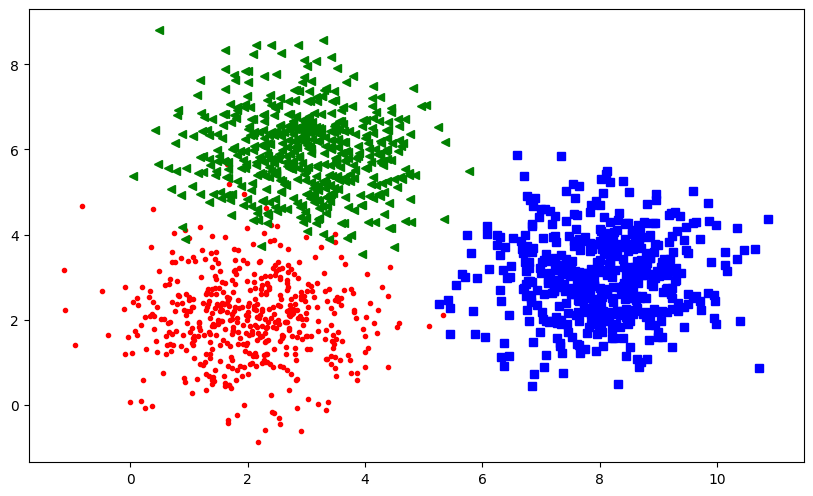

In [ ]:
# visualize
plt.figure(figsize=(10, 6), dpi=100)


plt.plot(X0[0], X0[1], 'r.')
plt.plot(X1[0], X1[1], 'bs')
plt.plot(X2[0], X2[1], 'g<')


plt.show()



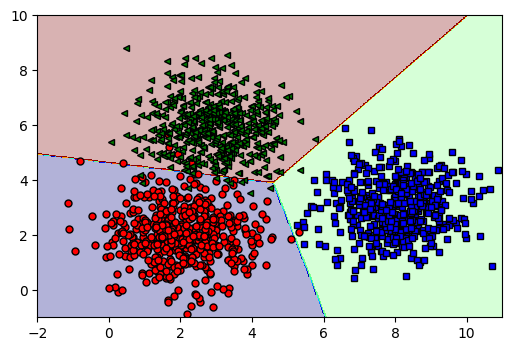

In [ ]:
def visualize(w, X, y, x_axis, y_axis, n_=400, level_sets=200):
  plt.figure(dpi=100)
  x_ = np.linspace(x_axis[0], x_axis[1], n_)
  y_ = np.linspace(y_axis[0], y_axis[1], n_)

  x_, y_ = np.meshgrid(x_, y_)
  x = np.vstack((np.ones((1, n_ * n_)), x_.ravel(), y_.ravel()))
  z = predict_labels(w, x)
  z = z.reshape(n_, n_)
  
  X_0, Y_0 = X[1:, y == 0]
  X_1, Y_1 = X[1:, y == 1]
  X_2, Y_2 = X[1:, y == 2]

  plt.plot(X_0, Y_0, 'ro', markersize=5, markeredgecolor='k')
  plt.plot(X_1, Y_1, 'bs', markersize=5, markeredgecolor='k')
  plt.plot(X_2, Y_2, 'g<', markersize=5, markeredgecolor='k')

  plt.contourf(x_, y_, z, level_sets,cmap='jet', alpha = .3)

  plt.show()

visualize(w[-1], X, original_label, [-2, 11], [-1, 10])


# Using Scikit-Learn

In [ ]:
logreg = linear_model.LogisticRegression(C=1e10, 
        solver = 'lbfgs', multi_class = 'multinomial')
# cX = np.concatenate((X0, X1, X2), axis = 1)
# cX = np.concatenate((cX, np.ones((1, 1500))), axis = 0)
logreg.fit(X.T, np.argmax(Y, axis=0))
weight = logreg.coef_.T
print(weight)

[[ 17.22690545 -23.05156823   5.82466278]
 [ -5.54222464   9.61756361  -4.07533897]
 [ -1.65263433  -1.3637514    3.01638573]]


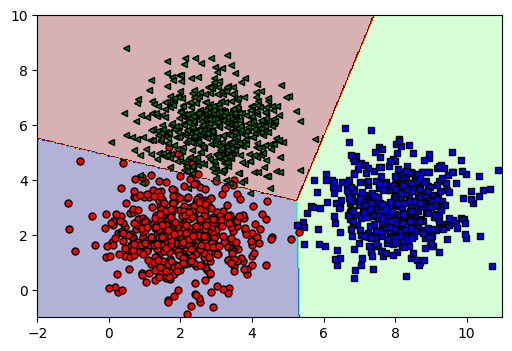

In [ ]:
def visualizeSklearn(w, X, y, x_axis, y_axis, n_=400, level_sets=200):
  plt.figure(dpi=100)
  x_ = np.linspace(x_axis[0], x_axis[1], n_)
  y_ = np.linspace(y_axis[0], y_axis[1], n_)

  x_, y_ = np.meshgrid(x_, y_)
  x = np.vstack((np.ones((1, n_ * n_)), x_.ravel(), y_.ravel()))
  z = logreg.predict(x.T)
  z = z.reshape(n_, n_)
  
  X_0, Y_0 = X[1:, y == 0]
  X_1, Y_1 = X[1:, y == 1]
  X_2, Y_2 = X[1:, y == 2]

  plt.plot(X_0, Y_0, 'ro', markersize=5, markeredgecolor='k')
  plt.plot(X_1, Y_1, 'bs', markersize=5, markeredgecolor='k')
  plt.plot(X_2, Y_2, 'g<', markersize=5, markeredgecolor='k')

  plt.contourf(x_, y_, z, level_sets,cmap='jet', alpha = .3)

  plt.show()

visualizeSklearn(weight, X, original_label, [-2, 11], [-1, 10])

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
x_train.shape

(60000, 28, 28)